<a href="https://colab.research.google.com/github/Monthe5/Portfolio-Projects/blob/main/Climate_Change_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# This project will analyse tweets related to climate change, global warming, and environmental policies by classifying them into categories
# (positive, negative, and neutral). The dataset consists of tweets collected between 2015 and 2020

# Questions to answer:
# 1. Are people more positive or negative about climate change in the years?
# 2. Which hashtags or keywords dominate different sentiment groups?


In [2]:
# Installing all the needed packages and uploading the file

import pandas as pd
import re
import nltk

!pip install emoji
import emoji


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download ('punkt')
nltk.download ('punkt_tab')
nltk.download ('stopwords')

from google.colab import files
uploaded = files.upload()
df=pd.read_csv("twitter_sentiment_data.csv")
print (df.columns)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 28.8 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving twitter_sentiment_data.csv to twitter_sentiment_data.csv
Index(['sentiment', 'message', 'tweetid'], dtype='object')


In [3]:
#Cleaning the data by removings URLs, usernames, hastags and emojis, converting to lowercase, and removing stop words


text_column = 'message'

def clean_tweet(text):
  if pd.isnull(text):
    return ""
    # removes URLS
  text = re.sub(r'http\S+\www\S+','',text)

  # removes mentions (@usernames)
  text= re.sub(r'@\w+', '', text)

  #remove hastags while keeping the word
  text = re.sub(r'#','', text)

  # remove emojis
  text= emoji.replace_emoji(text, replace='')

  # remove special characters and numbers
  text= re.sub(r'[^a-zA-Z\s]', '', text)

  # lower case
  text= text.lower()
  return text

  #To apply the cleaning process
df['clean_text'] = df[text_column].apply(clean_tweet)


# Tokenization and removal of stopwords

stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
  tokens = word_tokenize(text)
  filtered = [word for word in tokens if word not in stop_words]
  return ' '.join(filtered)


df['processed_text']= df['clean_text'].apply(tokenize_and_remove_stopwords)

# to save the cleaned file
df.to_csv('tweets_cleaned.csv', index= False)
print('tweets_cleaned.csv')

df.head()

tweets_cleaned.csv


,sentiment,message,tweetid,clean_text,processed_text
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840,climate change is an interesting hustle as it...,climate change interesting hustle global warmi...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641,rt watch beforetheflood right here as travel...,rt watch beforetheflood right travels world ta...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256,fabulous leonardo dicaprios film on climate ch...,fabulous leonardo dicaprios film climate chang...
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904,rt just watched this amazing documentary by l...,rt watched amazing documentary leonardodicapri...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153,rt pranita biswasi a lutheran from odisha giv...,rt pranita biswasi lutheran odisha gives testi...


In [15]:
# Question 1: Are people more positive or negative about climate change in the years?

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# to retrieve sentiment scores
def get_vader_sentiment(text):
  scores = analyzer.polarity_scores(text)
  return pd.Series([scores['neg'], scores['neu'], scores['pos'], scores['compound']])

# applying to the cleaned dataset
df[['neg', 'neu', 'pos', 'compound']] = df['processed_text'].apply(get_vader_sentiment)


# In order to classify the sentiment of each tweet clearly adding a sentiment label can help

def label_sentiment(compound):
  if compound >= 0.05:
    return "Positive"
  elif compound <=-0.05:
    return "Negative"
  else:
    return "Neutral"

df['sentiment_label'] = df['compound'].apply(label_sentiment)

print(df[['message', 'processed_text','neg', 'neu', 'pos', 'compound', 'sentiment_label']].head())

# To save the dataset

df.to_csv('tweets_with_sentiment.csv', index= False)





                                             message  \
0  @tiniebeany climate change is an interesting h...   
1  RT @NatGeoChannel: Watch #BeforeTheFlood right...   
2  Fabulous! Leonardo #DiCaprio's film on #climat...   
3  RT @Mick_Fanning: Just watched this amazing do...   
4  RT @cnalive: Pranita Biswasi, a Lutheran from ...   

                                      processed_text    neg    neu    pos  \
0  climate change interesting hustle global warmi...  0.109  0.400  0.491   
1  rt watch beforetheflood right travels world ta...  0.000  1.000  0.000   
2  fabulous leonardo dicaprios film climate chang...  0.000  0.526  0.474   
3  rt watched amazing documentary leonardodicapri...  0.000  0.678  0.322   
4  rt pranita biswasi lutheran odisha gives testi...  0.348  0.531  0.121   

   compound sentiment_label  
0    0.6908        Positive  
1    0.0000         Neutral  
2    0.8020        Positive  
3    0.5859        Positive  
4   -0.6908        Negative  


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


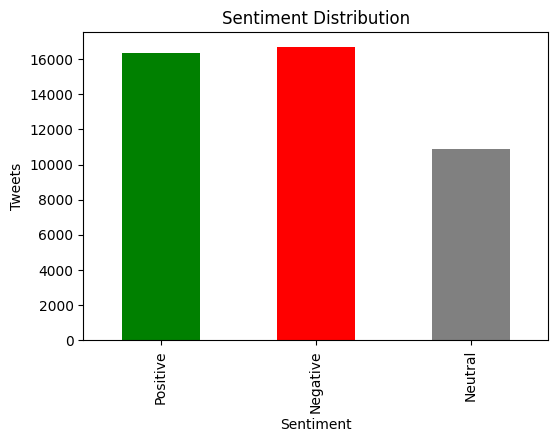

In [19]:
# To visualidze the results of the sentiment values

import matplotlib.pyplot as plt
import nltk

nltk.download('vader_lexicon')

SIA=SentimentIntensityAnalyzer()

df[['neg', 'neu', 'pos', 'compound']] = df ['processed_text'].apply(lambda x: pd.Series(SIA.polarity_scores(x)))


sentiment_counts = df['sentiment_label'].value_counts()

colors = {
    'Positive': 'green',
    'Negative': 'red',
    'Neutral': 'gray'
}

plt.figure(figsize=(6,4))
sentiment_counts.reindex(['Positive','Negative', 'Neutral']).plot(
    kind = 'bar',
    color= [colors['Positive'], colors['Negative'], colors['Neutral']]
)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweets')
plt.show()



In [22]:
# This section will focus on deep analysis and insights from the sentiment dataset by:
# 1. Identifying the top positive and negative tweets as shown by compuound scores
# 2. Getting the avergage sentiment scores

# To show the top 5 positive tweets
top_postive =  df.sort_values(by='compound', ascending=False).head(5)
print("Top Positive Tweets:")
print(top_postive[['message', 'compound']])

# To show top 5 negative tweets
top_negative = df.sort_values(by='compound', ascending=True).head(5)
print("Top Negative Tweets:")
print(top_negative[['message', 'compound']])

# to find the average sentiment scores
avg_scores = df[['neg', 'neu', 'pos', 'compound']].mean()
print("Average Sentiment Scores")
print(avg_scores)

Top Positive Tweets:
                                                 message  compound
40940  Honored with OSCAR AWARD 2016 Best Actor but s...    0.9524
7636   @brianalynn_27 your avi is the sole reason my ...    0.9493
36510  RT @BirdsGetStarted: #DemsDo\n\n*Care about eq...    0.9432
3960   RT @Martin_Durkin: Wonderful Trump appoints th...    0.9403
5054   RT @Martin_Durkin: Wonderful Trump appoints th...    0.9403
Top Negative Tweets:
                                                 message  compound
42690  You can blame the terrorists for everything no...   -0.9709
28585  RT @KathyLette: Worries about Trump's insanity...   -0.9633
25733  RT @NasMaraj: Ok here's my problem with yall, ...   -0.9628
14368  @iainkidd Genocide and mass rape are more horr...   -0.9612
19562  RT @heyjudeinbris: scaring Aussies half to dea...   -0.9552
Average Sentiment Scores
neg         0.119440
neu         0.755558
pos         0.125004
compound   -0.022008
dtype: float64


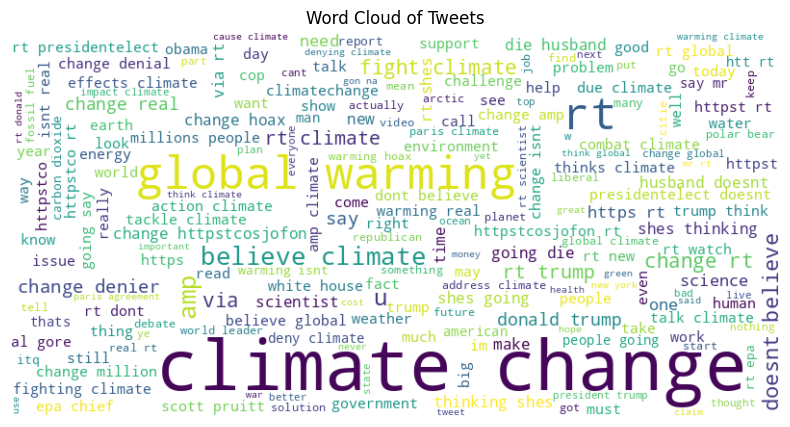

In [26]:
# To create an interactive dashboard

!pip install plotly wordcloud nltk --quiet

import plotly.express as px
from wordcloud import WordCloud
from collections import Counter

# sentiment pie chart

fig_pie = px.pie(
    df,
    names = 'sentiment_label',
    title = 'Sentiment Distribution',
    color = 'sentiment_label',
    color_discrete_map={'Positive':'green','Negative':'red', 'Neutral':'gray'}
)
fig_pie.show()


# For a bar chart showing the top hashtags
df['hashtags']= df['message'].apply(lambda x: re.findall(r'#(\w+)', x.lower()))

all_hashtags = [tag for sublist in df['hashtags'] for tag in sublist]

top_hashtags = Counter(all_hashtags).most_common(10)
hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])

fig_bar = px.bar(
    hashtags_df,
    x= 'Hashtag',
    y= 'Count',
    title= "Top 10 Hashtags",
    text = 'Count'
)

fig_bar.show()


# To get an overview of the most common words
all_text = " ".join(df['processed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

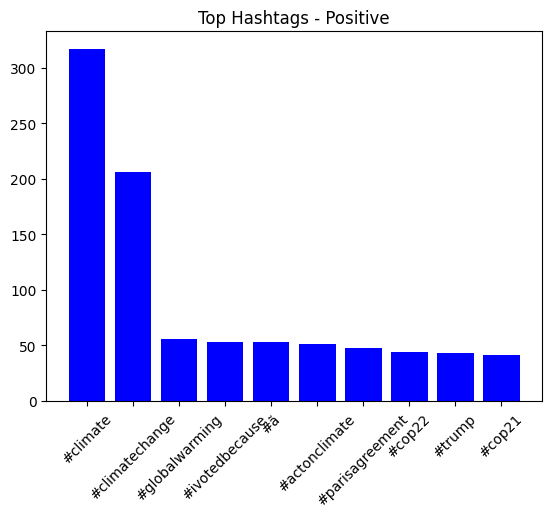

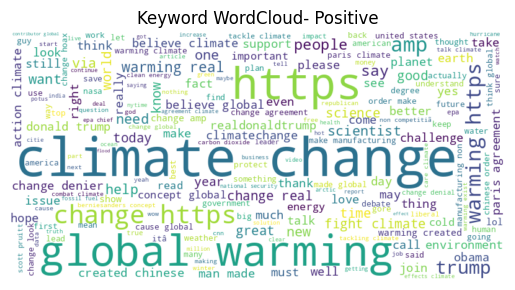

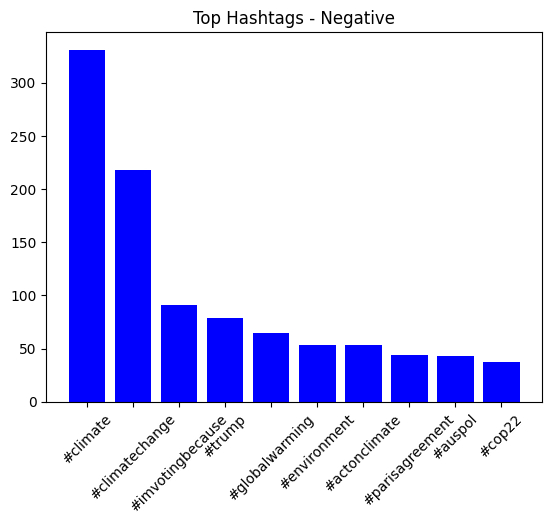

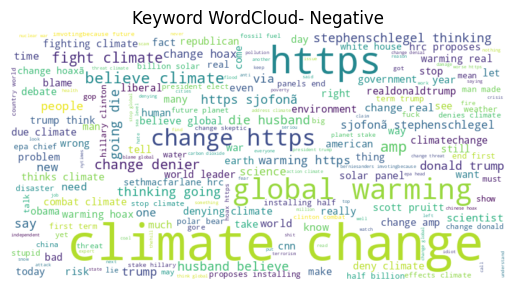

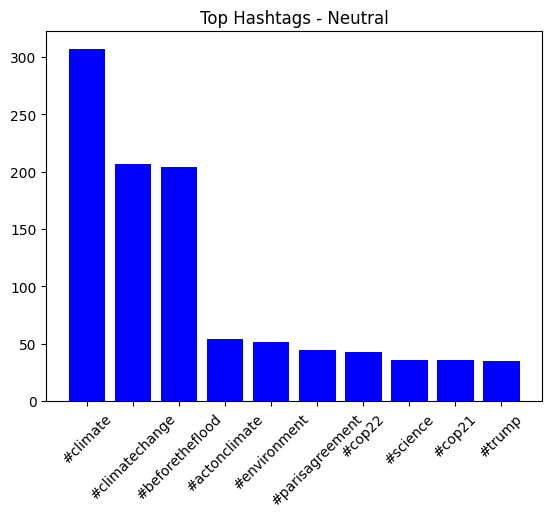

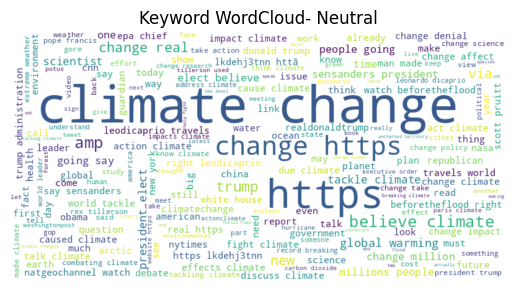

In [30]:
# Question 2: Which hashtags or keywords dominate different sentiment groups?
# This section will help to determine which hashtags dominate positive sentiments, which ones are common in negative sentiments, and which keywords
# tend to appear in neutral discussions

def extract_hastags(text):
  return re.findall(r"#\w+", text.lower())

def extract_keywords(text):
  words=re.findall(r"\b\w+\b", text.lower())
  return[w for w in words if w not in stop_words and len(w) > 2 and not w.startswith('#')]

# to plot the top hashtags
def plot_top_items(items, title, color):
  common= Counter(items).most_common(10)
  labels, values = zip(*common)
  plt.bar(labels, values, color=color)
  plt.xticks(rotation=45)
  plt.title(title)
  plt.show()

# To loop it through each sentiment group
for sentiment in ['Positive', 'Negative', 'Neutral']:
  sentiment_df = df[df['sentiment_label']== sentiment]
  all_hashtags = [tag for hashtags in sentiment_df['message'].apply(extract_hastags) for tag in hashtags]
  if all_hashtags:
    plot_top_items(all_hashtags, f"Top Hashtags - {sentiment}", color='blue')

# for keywords
  all_keywords = [word for words in sentiment_df['message'].apply(extract_keywords) for word in words]
  if all_keywords:
    wordcloud=WordCloud(width=800, height=400, background_color='white'). generate(' '.join(all_keywords))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Keyword WordCloud- {sentiment}")
    plt.show()

In [ ]:

# Analysis

# Question 1: Are people more positive or negative about climate change in the years?

# It is significant to state that people have a negative sentiment towards climate change with the avarage scores for the compound being;
# Average Sentiment Scores
# neg         0.119440
# neu         0.755558
# pos         0.125004
# compound   -0.022008

# However, further analysis shows that most sentiment is neutral with a slight lean towards negative sentiment.The distribution pie chart shows that
# there is more negative senitment about climate change (38%) compared to the postive sentiment (37.2%) and so does the bar graph.

# Question 2: Which hashtags or keywords dominate different sentiment groups?

# The 5 most common hashtags for this topic on tweeter are: climate, climate change,beforetheflood,actionclimate,and trump
# The 5 most common hashtags in groups with positive sentiment are: climate, climatechange, globalwarming,Ivotedbecause, and actionclimate
# The 5 most common hashtags in groups with negative sentiment are: climate, climatechange, Iamvotingbeacause, trump, and globalwarming
# The 5 most common hashtags in groups with neutral sentiment are: climate,  climatechange, beforetheflood, actionclimate,and enrivonment
